<a href="https://colab.research.google.com/github/delferns2001/FYP/blob/master/10H_tutorial_Learn_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Network in Tensorflow

In [101]:
# import tensorflow

import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

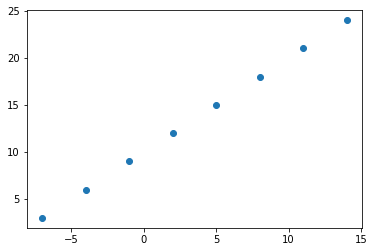

In [102]:
import numpy as np
import matplotlib.pyplot as plt

#Create features 
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


plt.scatter(X,y)

## Input and Output Shapes

In [103]:
#Create a demo tensir for the housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [104]:
input_shape = X.shape
output_shape = y.shape

print(input_shape, output_shape)

(8,) (8,)


In [105]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X.ndim , y.ndim

(1, 1)

In [106]:
X = tf.reshape(X, shape = (8,1))
y = tf.reshape(y,shape = (8,1))
X.ndim,y.ndim

(2, 2)

In [107]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

## Steps in modeling with tensorflow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function( in other wors, the function which tells the model how wrong it is) and learning optimizers (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of the model l)
3. **Fitting a model** - letting the model try to find patterns between X & y, or features and labels 

In [108]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the Model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compiling the model
#MAE is Mean Absolute Error (finds the error on average between pred and actual)
#Stochastic Gradient Descent (How the model improves itself)
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# 3. Fit the model
model.fit(X,y, epochs=200)


Epoch 1/200
1/1 [==============================] - 0s 450ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 32ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 0s 

##Improving the model

we can improve our model, by altering the we took to create the model 

1. **Creting A Model** - here we might add more layers, increase the umber of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Creatng A Model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (given the model more to learn from)



**Common ways of improving the deep model**
1. Adding layers 
2. Increase the activation function 
3. change the optimization function 
4. Change the learning rate
5. Fitting on more data 
6. Fitting for longer (epochs)

These are called **hyperperemeters** 

In [109]:
model.predict([100])

array([[174.08846]], dtype=float32)

In [110]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
              metrics = "mae"
              )

model2.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 765ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1094 - mae: 12.1094
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0935 - mae: 10.0935
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7101 - mae: 7.7101
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 4.1882 - mae: 4.1882
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0949 - mae: 6.0949
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2319 - mae: 7.2319
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8668 - mae: 5.8668
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 4.3110 - mae: 4.3110
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 3.9137 - mae: 3.9137
Epoch 11/100
1/1 [==============================] - 0s 12ms/step 

In [111]:
model.predict([17])[0][0], model2.predict([17])[0][0]

(30.908516, 30.006342)

##Evaluating a model 

Build the model -> Fit it -> Evaluate it -> tweak a model -> Fit it -> Evaluate it .....



In [112]:
X = tf.range(-100,100,4)
y = X + 10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [113]:
X = tf.reshape(X, shape = (50,1))
y = tf.reshape(y, shape = (50,1))
X.ndim,y.ndim

(2, 2)

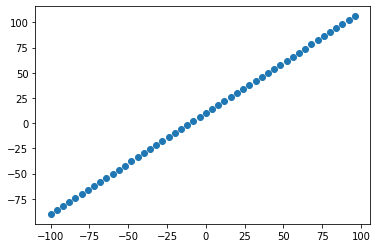

In [114]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets

* Training sets - The model learns fom this data, which is typically 70-80% of the total data
* Validation sets - The model gets tuned on this data, which is normally 10-15% of the data
* Test sets - The model is evaluated using the data, which is normally 10-15% of the data. 

In [115]:
# X = tf.random.shuffle(X)
# y = tf.random.shuffle(y)
X,y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56],
        [  60],
        [  64],
        [  68],
        [  72],
        [  76],
        [  80],
        [  84],
        [  88],
        [  92],
        [  96]], dtype=int32)>, <tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70],

In [116]:
n = len(X)

# splitting the data into first 80% 
X_train = X[:40]
y_train = y[:40]

#splitting the data into last 20%
X_test = X[40:]
y_test = y[40:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

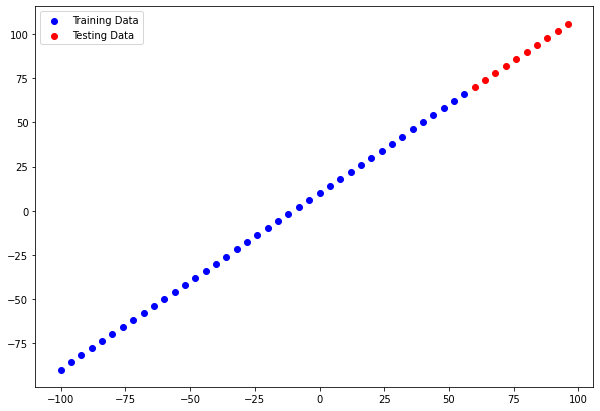

In [117]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = "b", label = "Training Data")
plt.scatter(X_test, y_test, c = "r", label = "Testing Data")
plt.legend()

In [118]:
from os import name
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu", input_shape = [1], name = "input_layer"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

model3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])


In [119]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_55 (Dense)            (None, 100)               10100     
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it train 
* Non - trainable param - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

In [120]:
model3.predict([60])

array([[4.8466535]], dtype=float32)

In [121]:
model3.fit(X_train,y_train, epochs = 100, verbose = 0 )

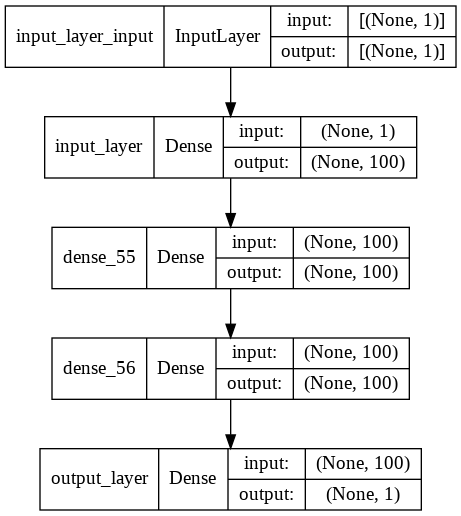

In [122]:
from tensorflow.keras.utils import plot_model

plot_model(model3, show_shapes=True)

### Visualising our models predictions

To visualise prediction, its a good idea to plot them against the ground truth labels

often you'll see this in the form `y_test` or `y_true` versus `y_pred` (ground truth with your models predictions)




In [123]:
#Make some predictions

y_pred = model3.predict(X_test)
y_test,y_pred

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>, array([[ 71.829575],
        [ 75.95272 ],
        [ 80.07587 ],
        [ 84.19899 ],
        [ 88.32594 ],
        [ 92.46452 ],
        [ 96.60325 ],
        [100.74198 ],
        [104.88456 ],
        [109.02489 ]], dtype=float32))

In [124]:
#Plotting function 
#Fucntion can be used to keep plotting prediction vs test labels
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):

  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c = "b", label = "Training Data")
  plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
  plt.scatter(test_data, predictions, c = "r", label = "Predicted data")
  plt.legend()
  plt.show()

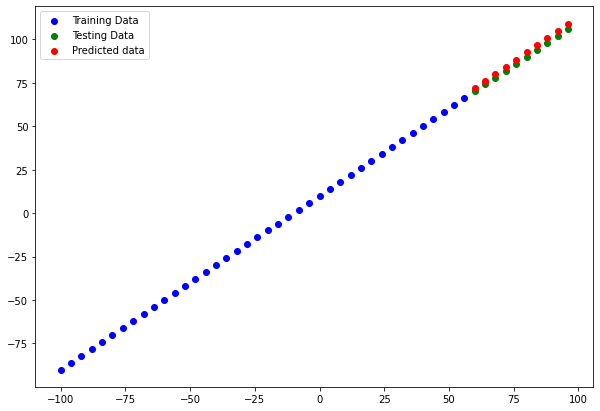

In [125]:
plot_prediction()

### Evaluation Model predictions with regression evalution metrics 

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's predictions" 
* MSE - mean square error, "square the average errors"

In [126]:
#Evaluate the model 
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 202ms/step - loss: 2.4102 - mae: 2.4102


[2.4102301597595215, 2.4102301597595215]

**Checking the different errors checking mechanisms**
* MAE
* MSE
* Huber
  

In [127]:
y_test,tf.constant(y_pred)

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>, <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 71.829575],
        [ 75.95272 ],
        [ 80.07587 ],
        [ 84.19899 ],
        [ 88.32594 ],
        [ 92.46452 ],
        [ 96.60325 ],
        [100.74198 ],
        [104.88456 ],
        [109.02489 ]], dtype=float32)>)

In [128]:
# Calculate the mean absolute error
# Check the tensor are same shape 
# I think they have to both be on 1 dimnsion 

mae =  tf.metrics.mean_absolute_error(y_true = tf.reshape(y_test, shape = (10)),y_pred= tf.reshape(y_pred, shape = (10)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.4102294>

In [129]:
#Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true = tf.reshape(y_test, shape = (10)),y_pred= tf.reshape(y_pred, shape = (10)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.955512>

In [130]:
#Make a function to reuse MAE and MSE
def mae (y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred)

### Running experiments to improve our model

1. Get more data - get more example for the model to train on (more oportunities to learn patterns or relationships between features and labels 
2. Make Model Larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train fro longer - give model more chance to find patterns in the data

3 Modeling experiments: 

1. `model_1` - model_1 same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 
5. `model_5` - 

In [131]:
# Model 1

# Setting the random seed
tf.random.set_seed(42)

#1. Creating the first model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]
                )

#3. Fit the model 
model_1.fit(X_train,y_train, epochs = 100, verbose = 0)

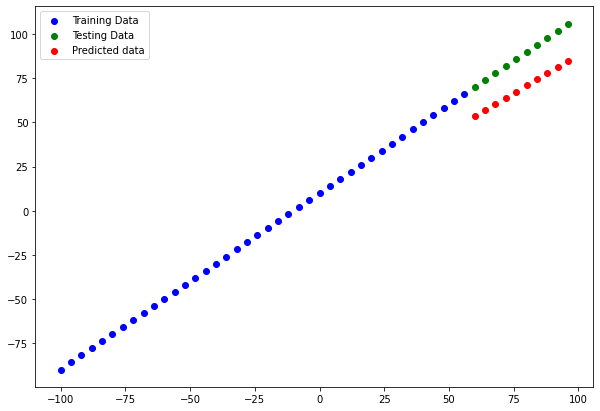

In [132]:
#Make and plot prediction for model_1

y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [133]:
# Calculate MAE and MSE of the model 

a = tf.reshape(y_test, shape = (10))
b = tf.reshape(y_pred_1, shape = (10))

mae_1 = mae(a,b)
mse_1 = mse(a,b)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [134]:
#Model 2

tf.random.set_seed(42)

# 1. Create the Model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(optimizer = tf.keras.optimizers.SGD(),
               loss = tf.keras.losses.mae,
               metrics = ["mae"])

#3. Fit the model 
model_2.fit(X_train,y_train, epochs = 100, verbose = 0)



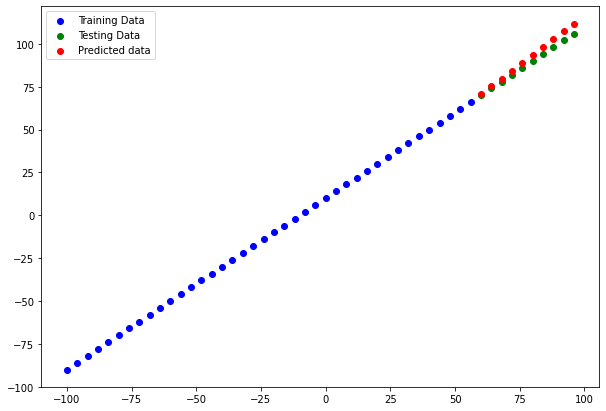

In [135]:
y_pred_2 = model_2.predict(X_test)
plot_prediction(predictions = y_pred_2)

In [136]:
# Calculate model_2 Evaluation metrics 
a = tf.reshape(y_test, shape = (10))
b = tf.reshape(y_pred_2, shape = (10))

mae_2 = mae(a,b)
mse_2 = mse(a,b)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [137]:
# Model 3 


model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.mae,
                metrics = ["mae"])

model_3.fit(X_train,y_train, epochs = 500, verbose = 0)

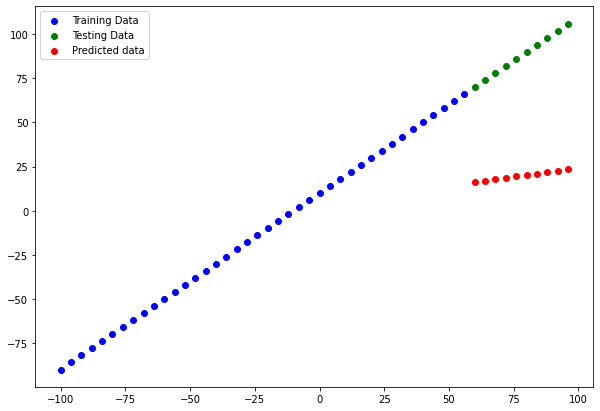

In [138]:
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions = y_pred_3)

In [139]:
a = tf.reshape(y_test, shape = (10))
b = tf.reshape(y_pred_3, shape = (10))

mse_3 = mse(a,b)
mae_3 = mae(a,b)

mse_3,mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4729.35>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.149315>)

## Comparing the results of our experiments

Comparing the 3 models

In [140]:
#Comparing models results using a pandas dataframe 

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.149315,4729.350098


Looks like: `model_2` performed the best



In [141]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

It is a good habit to track the results from each models produced

It can get tedious if there is a lot of experiments were to be run

**we can use the following tools to helps us to conduct a lot of experiments**

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments 
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)



## Saving Our Models

There are two main format we can save our models too:

1. The SavedModel format
2. The HDF5 format

In [142]:
#Save the model using SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [143]:
#Save the model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

##Loading in a saved model

In [144]:
#Load in a savedmodel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary(),model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

(None, None)

In [145]:
# Compare model 2 vs SavedModel Model
model_2_preds = model_2.predict(X_test)
model_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == model_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [146]:
#Load in a HDF5 format model
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_HDF5_format.summary(),model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                20        
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

(None, None)

In [147]:
# Compare model 2 vs HDF5 Model
model_2_preds = model_2.predict(X_test)
model_HDF5_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == model_HDF5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model(or any other file) from Google Colab 

To download files from Google Colab:

1. Go to "files" tab and right click on the file and click "Download"
2. Use Code (see the ceel below)
3. Save it to Google Drive by connecting Google Drive and copying it there (2 code cell below)

In [148]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
# Saving a file from Google colab to Google Drive (required mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/10H_TensorFlow_folder

In [150]:
!ls  /content/drive/MyDrive/10H_TensorFlow_folder

best_model_HDF5_format.h5


## A Larger Example

In [151]:
#Import required libraries 

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [152]:
#Reading the insurence data 

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [153]:
# Encoding the dataset 
# One Hot encoding

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [154]:
#Creating the X and y Values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X.head(),y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [155]:
#Creating Training and Testing set 
# Using sklearn we can split the dataset as well as shuffling it
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
len(X_train),len(y_train),len(X_test),len(y_test)


# # 2nd way of doing it
# X_train = tf.constant(X[:1070])
# y_train = y[:1070]
# X_test = X[1070:]
# y_test = y[1070:]



(1070, 1070, 268, 268)

In [156]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [157]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [158]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create the model 2
insurance_model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model2.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. Fit the model
insurance_model2.fit(X_train,y_train, epochs = 100, verbose = 0)

In [159]:
#Checking the results of insurance model 2
insurance_best_model_evaluation = insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


In [160]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create the model 3
insurance_model3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model3.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. Fit the model
history = insurance_model3.fit(X_train,y_train, epochs = 200, verbose = 0)

In [161]:
#Checking the results of insurance model 3
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [162]:
insurance_y_pred = insurance_model3.predict(X_test)

Text(0.5, 0, 'epochs')

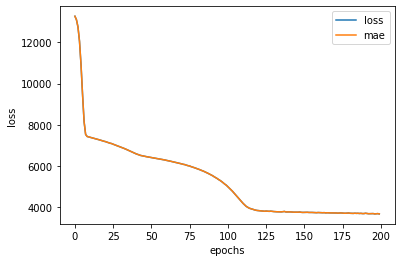

In [163]:
# Plot History (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question** How long should the model be trained for??

It depends on the problem.

Tensorflow also has a solution! It's called the [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which can be added to the model, to stop training until the model stops improving for certain epochs. 

## Processing data (normalisation and standerdisation)

In terms of scaling values, neural networks tend to prefer normalisation 

If you not sure which one to use, you can use both and see which one works better!

[Good read on this topic](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from SciKit-Learn

In [165]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #Turn all column data between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y values

X = insurance.drop("charges", axis =1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Fit the column transformer to out training data

ct.fit(X_train)

#Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [166]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [167]:
# Data Preview
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [168]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

The data has been normalised and onehotencoded

In [169]:
# Build a neural network model to fit on our normalised data 
tf.random.set_seed(42)

# 1.Create the Model
insurance_model4 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model4.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# 3. Fit the model 
insurance_model4.fit(X_train_normal,y_train, epochs = 100, verbose = 0)

In [170]:
#Evalute the model 
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [172]:
insurance_best_model_evaluation

[4924.34765625, 4924.34765625]